In [1]:
# %matplotlib inline
#加不加%matplotlib inline貌似现在没啥影响
import matplotlib.pyplot as plt
from scipy.misc import derivative#加载求导函数
import numpy as np

def 绘制标准坐标轴():
    import mpl_toolkits.axisartist as axisartist
    #创建画布
    fig = plt.figure(figsize=(8, 8))
    #使用axisartist.Subplot方法创建一个绘图区对象ax
    ax = axisartist.Subplot(fig, 111)  
    #将绘图区对象添加到画布中
    fig.add_axes(ax)

    #通过set_visible方法设置绘图区所有坐标轴隐藏
    ax.axis[:].set_visible(False)

    #ax.new_floating_axis代表添加新的坐标轴
    ax.axis["x"] = ax.new_floating_axis(0,0)

    #给x坐标轴加上箭头,"->"表示是空箭头，size = 0.5表示箭头大小
    ax.axis["x"].set_axisline_style("->", size = 0.5)

    #添加y坐标轴，且加上箭头,"-|>"则是实心箭头
    ax.axis["y"] = ax.new_floating_axis(1,0)
    ax.axis["y"].set_axisline_style("-|>", size = 0.5)

    #设置x、y轴上刻度显示方向
    ax.axis["x"].set_axis_direction("top")
    ax.axis["y"].set_axis_direction("right")

## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解B决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [2]:
import numpy as np
import random
随机数 = np.random.random((20, 2))
X = 随机数[:, 0]
Y= []
训练数据=[]

for x in X:
    y=x*7+ 3 + random.randint(-5, 5)
    Y.append(y)
    训练数据.append([x,y])



$ loss_{single}=(y-\hat y)^2=(y-kx-b)^2$

$ loss = \frac{1}{n} \sum{(y_i - kx_i - b)}^2 $

$ \frac{\partial{loss}}{\partial{k}} = \frac{2}{n}\sum(kx_i-y_i+b)x_i$

$ \frac{\partial{loss}}{\partial{b}} = \frac{2}{n}\sum(b+kx_i-y_i)=\frac{2}{n}\sum(kx_i-y_i+b)$

梯度为
$ (\frac{\partial{loss}}{\partial{k}},\frac{\partial{loss}}{\partial{b}})$

梯度的单位向量$ (\frac {\frac{\partial loss}{\partial k}}{\sqrt{(\frac{\partial loss}{\partial k})^2 + (\frac{\partial loss}{\partial b })^2}},\frac {\frac{\partial loss}{\partial b}}{\sqrt{(\frac{\partial loss}{\partial k})^2 + (\frac{\partial loss}{\partial b })^2}})$

令$ \frac{\partial{loss}}{\partial{k}}=dk,\frac{\partial{loss}}{\partial{b}}=db$



In [3]:
def 求损失函数梯度方向(k,b,训练数据):                                      #损失函数loss = \frac{1}{n} \sum{(y_i - kx_i - b_i)}^2 
    #损失函数梯度
    dk=0
    db=0
    #import math
    for 数据 in 训练数据:                                                  #数据=[x,y]
        x_i=数据[0]
        y_i=数据[1]
        dk += x_i*(k*x_i-y_i+b)
        db += (k*x_i-y_i+b)
        #print(dk,db)
    dk=2/len(训练数据)*dk
    db=2/len(训练数据)*db
    #单位向量=[dk/math.sqrt(dk*dk+db*db),db/math.sqrt(dk*dk+db*db)]       #使用单位向量，如果初始误差太大，步进太慢，直接使用梯度向量可以快速逼近
    return [dk,db]

In [4]:
def 线性回归(训练数据,步长,迭代次数):
    import random
    k = random.random() * 200 - 100  # -100 100
    b = random.random() * 200 - 100  # -100 100
    for i in range(迭代次数):
        方向=求损失函数梯度方向(k,b,训练数据)
        k=k+方向[0]*步长*(-1)                            #梯度下降，沿梯度反方向迭代，故乘以-1
        b=b+方向[1]*步长*(-1)
    return (k,b)

In [5]:
kb=线性回归(训练数据,步长=0.1,迭代次数=4000) #步长越短，需要迭代的次数越多。步长越长，越容易震荡，不容易得出结果。如何选取合适的步长呢？
print("k=",kb[0],"b=",kb[1])

k= 3.997788621641573 b= 4.505961080337281


In [6]:
def f(x):
    return kb[0]*x+kb[1]
f(54)

220.3865466489822

In [7]:
from sklearn.linear_model import LinearRegression #加载sklearn的LinearRegression模块

In [8]:
reg = LinearRegression().fit(X.reshape(-1, 1), Y)
print("k=",reg.coef_,"b=",reg.intercept_)                    #用LinearRegression拟合k和b与自己写的线性回归函数做个对比。

k= [3.99778862] b= 4.505961080337261


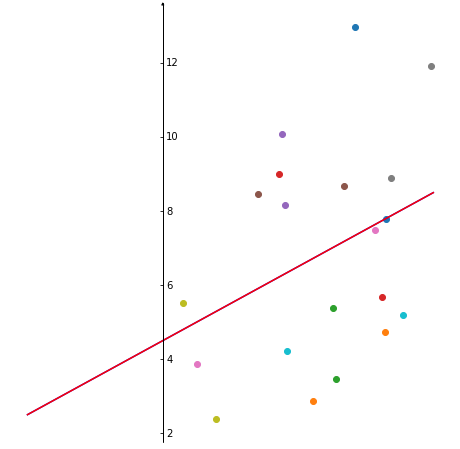

In [9]:
x=np.arange(-0.5,1,0.0001)
g=reg.coef_*x+reg.intercept_         #LinearRegression拟合出来的直线，红色
h=kb[0]*x+kb[1]                      #自己写的线性回归函数拟合出来的直线，蓝色
绘制标准坐标轴()
for 数据 in 训练数据:
    plt.scatter(数据[0],数据[1])
plt.plot(x,h,color='blue')
plt.plot(x,g,color='red')           #红色线后绘制，两个拟合直线高度重合时，红色会盖住蓝色

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [10]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in 训练数据]

In [11]:
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return (x1-x2)*(x1-x2)#cosine(x1, x2)                                 #两点距离等于向量夹角的cos值？？？

In [18]:
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    # 已经获得了最相似的数据集
    counter=0
    for xi in most_similars:
        counter += xi[1]
    most_common=counter/k
    return most_common
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 

In [19]:
f(0.5)

6.504855391158067

In [20]:
predict(0.5,5)

6.874302104771718

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [15]:
# 

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [16]:
# you code here

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [17]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)